# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 1

In [3]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline

In [7]:
# Dataset
clean_data_path = "dataset/autos/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [8]:
list(df)

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'postalCode',
 'lastSeen',
 'yearOfCreation',
 'yearCrawled',
 'monthOfCreation',
 'monthCrawled',
 'NoOfDaysOnline',
 'NoOfHrsOnline',
 'yearsOld',
 'monthsOld']

## Distribuição de Veículos com base no Ano de Registro

In [69]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None)
    
    The output formats available depend on the backend being used.
    
    Parameters
    ----------
    
    fname : str or file-like object
        A string containing a path to a filename, or a Python
        file-like object, or possibly some backend-dependent object
        such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is *None* and *fname* is a string, the output
        format is deduced from the extension of the filename. If
        the filename has no extension, the value of the rc parameter
        ``savefig.format`` is used.
    
        If *fname* is not a string, remember 

In [32]:
print(np.min(df['yearOfRegistration']),np.max(df['yearOfRegistration']))

1910 2016


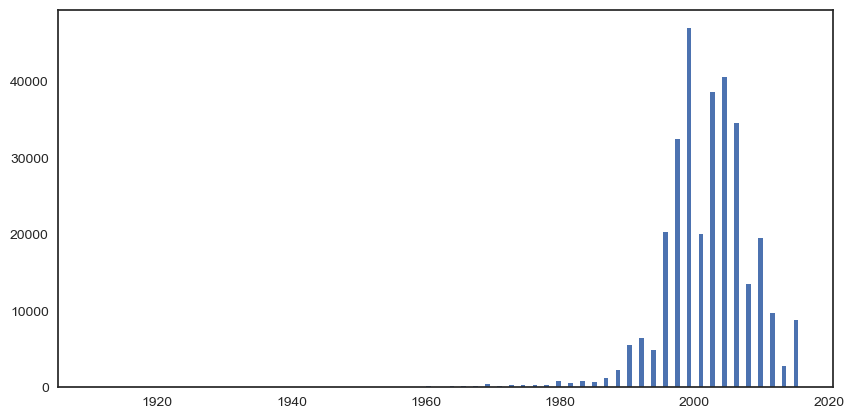

In [43]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro
plt.figure(figsize=(10,5), dpi = 100)
plt.hist(df['yearOfRegistration'], bins = 60, rwidth=0.4)
plt.show()

C:\Users\Caio\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


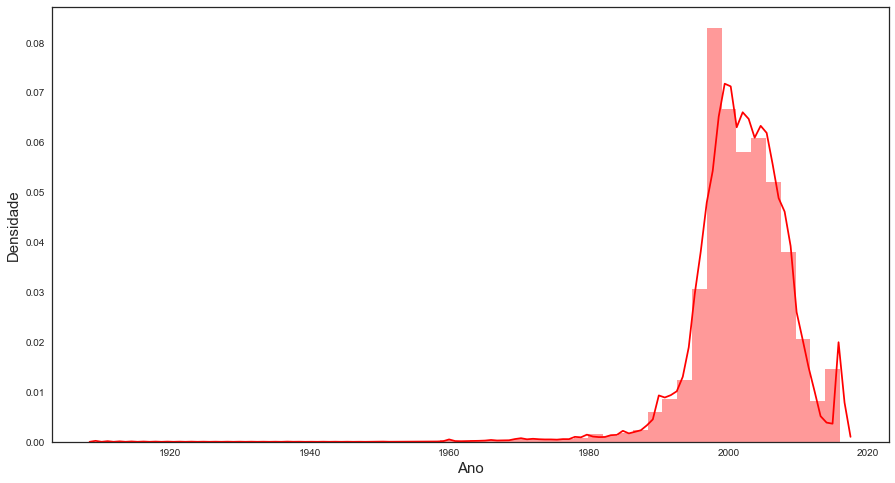

In [82]:
fig,ax = plt.subplots(figsize=(15,8))
sns.distplot(df['yearOfRegistration'], color='r')
plt.ylabel('Densidade', fontsize = 15)
plt.xlabel('Ano', fontsize = 15)
plt.show()

In [83]:
# Salvando o plot
fig.savefig("plots/Analise1/vehicle-distribution.png")

## Variação da faixa de preço pelo tipo de veículo

In [88]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, hold=None, data=None)
    Make a box and whisker plot.
    
    Make a box and whisker plot for each column of ``x`` or each
    vector in sequence ``x``.  The box extends from the lower to
    upper quartile values of the data, with a line at the median.
    The whiskers extend from the box to show the range of the
    data.  Flier points are those past the end of the whiskers.
    
    Parameters
    ----------
    x : Array or a sequence of vectors.
        The input data.
    
    notch : bool, optional (False)
        If `True`, will pr

In [113]:
df[['price','model']]

,price,model
0,480,golf
1,18300,Other
2,9800,grand
3,1500,golf
4,3600,fabia
5,650,3er
6,2200,2_reihe
7,0,andere
8,999,golf
9,2000,3_reihe


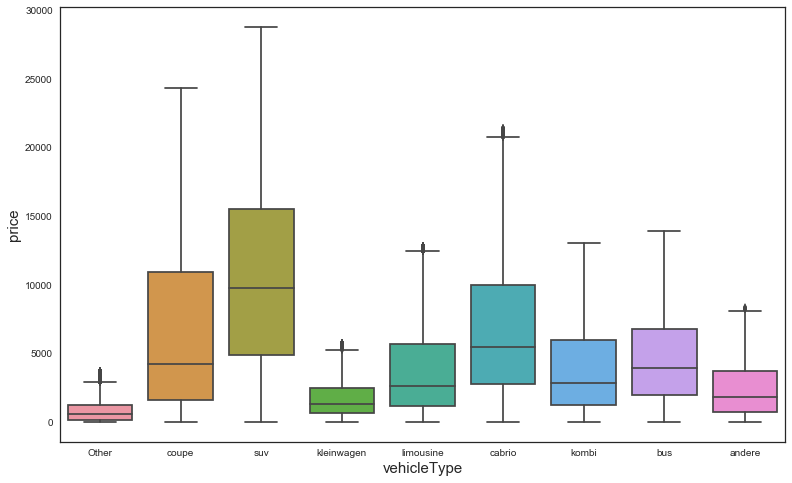

In [128]:
# Crie um Boxplot para avaliar os outliers
fig2, ax2 = plt.subplots(figsize=(13,8))
plt.ylabel('Preço', fontsize = 15)
plt.xlabel('Tipo de veículo', fontsize = 15)
sns.boxplot(data=df, x="vehicleType", y="price")
plt.show()

In [129]:
# Salvando o plot
fig2.savefig("plots/Analise1/price-vehicleType-boxplot.png")

## Contagem total de veículos à venda conforme o tipo de veículo

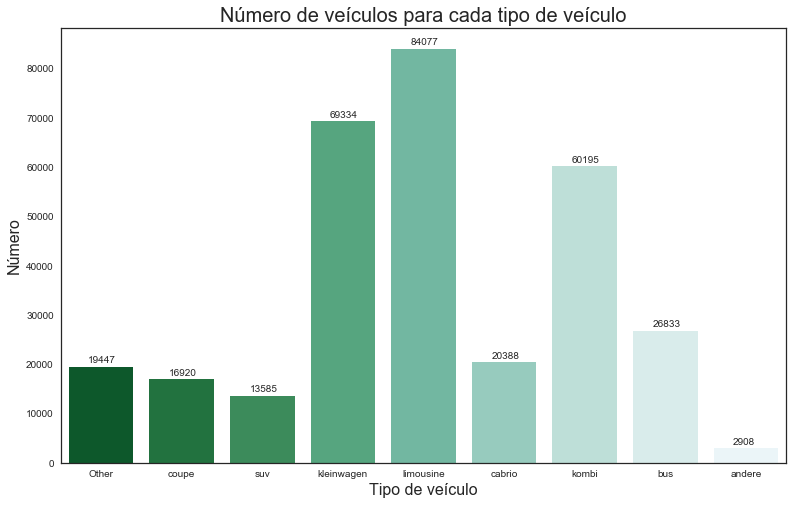

In [194]:
# Crie um Count Plot que mostre o número de veículos pertencentes a cada categoria 
fig3, ax3 = plt.subplots(figsize=(13,8))
sns.countplot(x=df['vehicleType'], palette='BuGn_r')
plt.xlabel('Tipo de veículo', fontsize = 16)
plt.ylabel('Número', fontsize = 16)
plt.title('Número de veículos para cada tipo de veículo', fontsize = 20)
for n in ax3.patches:
    ax3.annotate(n.get_height(), (n.get_x()+0.24, n.get_height()+800))
plt.show()

In [ ]:
# Salvando o plot
g.savefig("plots/Analise1/count-vehicleType.png")

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>